<p style="font-family: Cambria; text-align: center; font-size: 48px;"> II. Descriptive Analysis</h1>

In [2]:
#Importing all the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
#Reading the cleaned data 
data=pd.read_excel("GDM_Python_Aug2025.xlsx")

In [4]:
#Creating a copy of the original data to work on, so that the original data is not modified
df=data.copy()

<p style="font-family: Cambria; font-size: 18px;"><b> Q1.How many participants were diagnosed with GDM ('GDM Diagonised'), and what is their percentage the dataset ?</p>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: Since the prevalence of Gestational Diabetes Mellitus (GDM) is the primary focus of our analysis, it helps in understanding the distribution of the condition in this specific group. Out of all participants, 13.10% were diagnosed with GDM.Given the global prevalenve of GDM is ~7 - 15%,this suggests a relatively high burden of GDM in this population, possibly indicating an at-risk group. 

In [9]:
yes = df['GDM Diagonised'].eq('Yes').sum()
total = len(df)
print(f"GDM cases: {yes}")
print(f"GDM rate: {yes / total:.2%}")

GDM cases: 74
GDM rate: 13.10%


<p style="font-family: Cambria; font-size: 18px;"><b> Q2.How is the distribution of the dataset w.r.t age and GDM diagnosis?
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: GDM prevalence increases by 5 percentage points in the >30 age group (from 9.9% to 14.9%). Age > 30 is a clear risk factor.

In [10]:
counts = df.groupby('Age_gt_30')['GDM Diagonised'].value_counts().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0).mul(100).round(1)
percentages.columns = ['Not Recorded (%)', 'Non-GDM (%)', 'GDM (%)']
print(percentages)

           Not Recorded (%)  Non-GDM (%)  GDM (%)
Age_gt_30                                        
No                      2.0         88.2      9.9
Yes                     2.8         82.3     14.9


<p style="font-family: Cambria; font-size: 18px;"><b>Q3. What is the distribution of BMI values across the dataset? 
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: Higher BMI may be correlated to a higher risk of GDM.In this dataset,75% of participants have BMI ≤ 29.9 — approaching obesity.

   WeightinV1  Height_cms   BMI
0        59.4       169.6  20.7
1        70.1       154.9  29.2
2        64.9       157.8  26.1
3        67.1       164.7  24.7
4        67.5       169.9  23.4


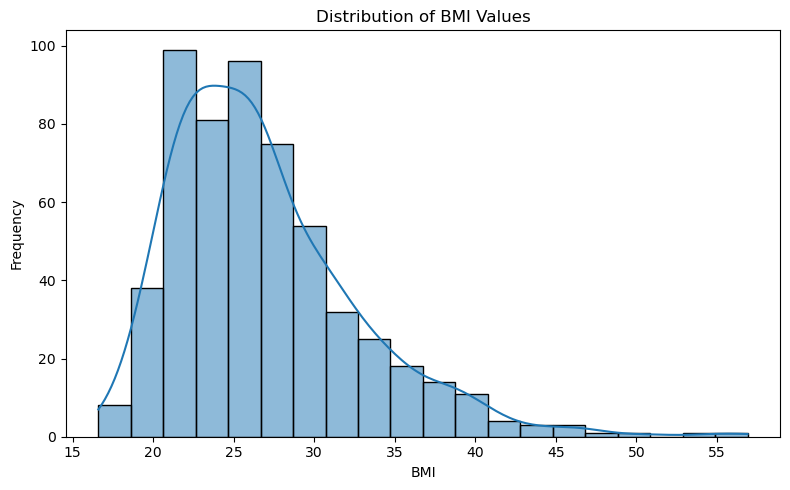

count    565.000000
mean      26.875398
std        5.834346
min       16.600000
25%       22.600000
50%       25.800000
75%       29.900000
max       56.900000
Name: BMI, dtype: float64

In [11]:
# Convert height from cm to meters
df['Height_m'] = df['Height_cms'] / 100
df['BMI'] = df['WeightinV1'] / (df['Height_m'] ** 2)
df['BMI'] = df['BMI'].round(1)
print(df[['WeightinV1', 'Height_cms', 'BMI']].head())
plt.figure(figsize=(8, 5))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('Distribution of BMI Values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
df['BMI'].describe()

<p style="font-family: Cambria; font-size: 18px;"><b>Q4. Compare participants of age > 30 and age < 30 with  BMI range for both GDM and Non gdm participants?
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning:  GDM is more prevalent among patients who are aged above 30 and have abnormal BMI. Obesity is a consistent risk factor: Across both age groups, obesity is overrepresented in GDM cases compared to non-GDM.

In [12]:
# Define BMI categories function 
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMIinV1'].apply(bmi_category)

# Map age and GDM for clarity
df['Age_Group'] = df['Age_gt_30'].map({'No': '<=30', 'Yes': '>30'})
df['GDM_Status'] = df['GDM Diagonised'].map({'No': 'No GDM', 'Yes': 'GDM'})

age_groups = ['<=30', '>30']
gdm_statuses = ['No GDM', 'GDM']

for age in age_groups:
    for gdm in gdm_statuses:
        subset = df[(df['Age_Group'] == age) & (df['GDM_Status'] == gdm)]
        counts = subset['BMI_Category'].value_counts()
        total = counts.sum()
        print(f"\nAge Group: {age}, GDM Status: {gdm}")
        for category, count in counts.items():
            pct = (count / total) * 100 if total > 0 else 0
            print(f"  {category}: {count} ({pct:.1f}%)")
        if total == 0:
            print("  No participants in this group.")


Age Group: <=30, GDM Status: No GDM
  Normal: 78 (43.6%)
  Overweight: 55 (30.7%)
  Obese: 43 (24.0%)
  Underweight: 3 (1.7%)

Age Group: <=30, GDM Status: GDM
  Normal: 10 (50.0%)
  Obese: 6 (30.0%)
  Overweight: 4 (20.0%)

Age Group: >30, GDM Status: No GDM
  Normal: 128 (43.0%)
  Overweight: 105 (35.2%)
  Obese: 63 (21.1%)
  Underweight: 2 (0.7%)

Age Group: >30, GDM Status: GDM
  Obese: 23 (42.6%)
  Overweight: 16 (29.6%)
  Normal: 15 (27.8%)


<p style="font-family: Cambria; font-size: 18px;"><b>Q5.What is the average BirthWeight of infants in the dataset, and how does it vary between infants born to mothers with and without GDM?
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning:  Birth weight is a critical outcome measure. Comparing birth weights between GDM and non-GDM groups can help  understand whether lower birth weight or higher birth weight are common,helps assess the impact of GDM on fetal growth, effectiveness of clinical management, and potential risks for adverse outcome. 
In this dataset, mothers with GDM gave birth to babies with slightly lower average birth weight (3.42 kg vs 3.54 kg). While this contradicts the usual expectation of increased birth weight in GDM, it may reflect effective management, earlier deliveries, or sample-specific factors

In [5]:
overall = df['BirthWeight'].mean()
gdm = df[df['GDM Diagonised'] == 'Yes']['BirthWeight'].mean()
no_gdm = df[df['GDM Diagonised'] == 'No']['BirthWeight'].mean()

print(f"Average BirthWeight overall: {overall:.2f}")
print(f"With GDM: {gdm:.2f}")
print(f"Without GDM: {no_gdm:.2f}")

Average BirthWeight overall: 3.53
With GDM: 3.42
Without GDM: 3.54


<p style="font-family: Cambria; font-size: 18px;"><b>Q6. What is the distribution of types of delivery?
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: It is important we know how many had normal and C-section in the dataset so we could further analyze the factors contributing to a particular delivery type. In this dataset, vaginal deliveries occur twice as often as cesarean deliveries.

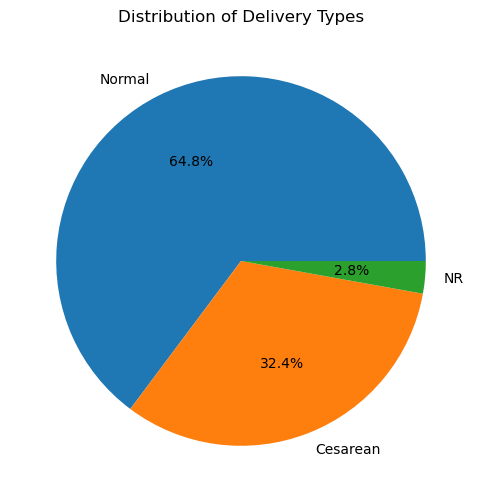

In [14]:
label_map = {0.0: 'Normal', 1.0: 'Cesarean','NR' : 'NR'}
df['delivery_type_label'] = df['Caesarean'].map(label_map)

# Plot the pie chart
df['delivery_type_label'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Distribution of Delivery Types'
)

plt.ylabel('')  # Hide y-axis label
plt.show()


#What is the distribution of types of delivery?
# df['DeliveryType'] = df['Caesarean'].map({0.0: 'Normal', 1.0: 'Cesarean','NR':'NR'})
# delivery_counts=df['DeliveryType'].value_counts()
# delivery_percent = df['DeliveryType'].value_counts(normalize=True) * 100
# distribution=pd.DataFrame({'Count': delivery_counts,
#                         'Percntage':delivery_percent.round(2)
#                           })
# print(distribution)

<p style="font-family: Cambria; font-size: 18px;"><b>Q7. What percentage of patients have a history of GDM?
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: History of GDM increases the risk of GDM diagnosis for the current pregnancy signigicantly. Understanding the distribution of patients by history of GDM is critical for identifying high-risk populations, enabling targeted interventions, and improving maternal and fetal health outcomes.

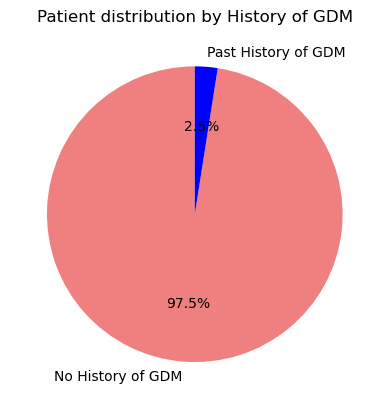

In [15]:
history_gdm = df['PreviousGDM10 V1'].value_counts().rename({0 : 'No History of GDM', 1:'Past History of GDM'})
#pie chart
plt.pie(history_gdm, labels=history_gdm.index, autopct='%1.1f%%',startangle = 90, colors=['lightcoral', 'blue'])
plt.title("Patient distribution by History of GDM")
plt.show()

<p style="font-family: Cambria; font-size: 18px;"><b>Q8. What is the distribution of gestational age at delivery ? 
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: Understanding the distribution of gestational age at delivery can provide insights into the typical delivery times within the dataset and identify any unusually early or late deliveries. This is crucial for assessing pregnancy outcomes. Out of 565 births in this dataset, 96.5% were full term or later, while 3.5% were preterm. Specifically, 2.8% were moderate to late preterm, 0.4% very preterm, and 0.2% extremely preterm.

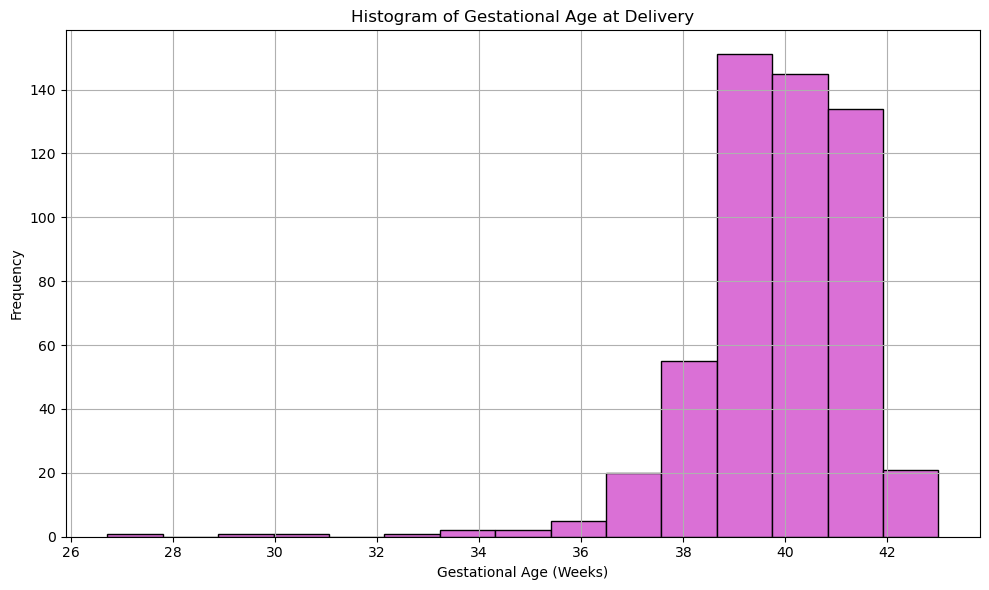


--- Categorized Gestational Ages ---
GA Category
Full term or later          546
Moderate to late preterm     16
Very preterm                  2
Extremely preterm             1
Name: count, dtype: int64


In [16]:
plt.figure(figsize=(10,6))
df['GA at delivery'].plot(kind='hist', bins=15, color='orchid', edgecolor='black')
plt.title("Histogram of Gestational Age at Delivery")
plt.xlabel("Gestational Age (Weeks)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

def categorize_ga(ga_weeks):
    if ga_weeks < 28:
        return 'Extremely preterm'
    elif ga_weeks < 32:
        return 'Very preterm'
    elif ga_weeks < 37:
        return 'Moderate to late preterm'
    else:
        return 'Full term or later'

# Apply categorization to your dataset
df['GA Category'] = df['GA at delivery'].apply(categorize_ga)

# Display counts by category
print("\n--- Categorized Gestational Ages ---")
print(df['GA Category'].value_counts())

<p style="font-family: Cambria; font-size: 18px;"><b>Q9. What  is the average gestational age at delivery for  GDM and Non GDM  patients?
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: The average gestational age at delivery helps assess the impact of GDM on pregnancy outcomes like pre-term births.The data show that GDM patients deliver on average 5 days earlier than non-GDM patients (39.2 vs. 39.9 weeks). This likely reflects routine clinical decisions to deliver GDM pregnancies slightly earlier to reduce maternal and neonatal risks.

In [17]:
filtered_df = df[
    (df['GDM Diagonised'].isin(['Yes', 'No'])) & 
    (df['GA at delivery'].notnull())
].copy()

avg_ga = filtered_df.groupby('GDM Diagonised')['GA at delivery'].mean()
print(avg_ga)

GDM Diagonised
No     39.924424
Yes    39.208494
Name: GA at delivery, dtype: float64


<p style="font-family: Cambria; font-size: 18px;"><b>Q10. What is the difference in distribution of HBA1C values between Visit 1 and Visit 3?
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: The average gestational age at delivery helps assess the impact of GDM on pregnancy outcomes like pre-term births.The data show that GDM patients deliver on average 5 days earlier than non-GDM patients (39.2 vs. 39.9 weeks). This likely reflects routine clinical decisions to deliver GDM pregnancies slightly earlier to reduce maternal and neonatal risks

In [18]:
# Check average HbA1c at Visit 1 and Visit 3 for each GDM group
mean_hba1c = df.groupby('GDM Diagonised')[['HBA1C_V1', 'HBA1C_V3']].mean().rename(columns = {'HBA1C_V1' : 'Avg HBA1C_V1','HBA1C_V3':'Avg HBA1C_V3'})
print(mean_hba1c)
print()

#get count and standard deviation
print('\t\t\t\t HbA1c Statistics')
stats_hba1c = df.groupby('GDM Diagonised')[['HBA1C_V1', 'HBA1C_V3']].agg(['count', 'mean', 'std'])
print(stats_hba1c)

                Avg HBA1C_V1  Avg HBA1C_V3
GDM Diagonised                            
NR                 31.500000     33.000000
No                 31.969163     33.266520
Yes                33.279412     33.823529

				 HbA1c Statistics
               HBA1C_V1                      HBA1C_V3                     
                  count       mean       std    count       mean       std
GDM Diagonised                                                            
NR                    2  31.500000  2.121320        2  33.000000  2.828427
No                  454  31.969163  2.351820      454  33.266520  2.838069
Yes                  68  33.279412  3.065677       68  33.823529  3.781105


<p style="font-family: Cambria; text-align: center; font-size: 48px;">III. Prescriptive Analysis</h1>

<p style="font-family: Cambria; font-size: 18px;"><b>Q1. Are women with GDM more likely to have a Cesarean than those without it?
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: GDM is associated with complications such as fetal macrosomia, pre-eclampsia, and poor labor progress — all of which are known to increase the risk of Cesarean delivery. Understanding this relationship helps obstetricians prepare better delivery plans

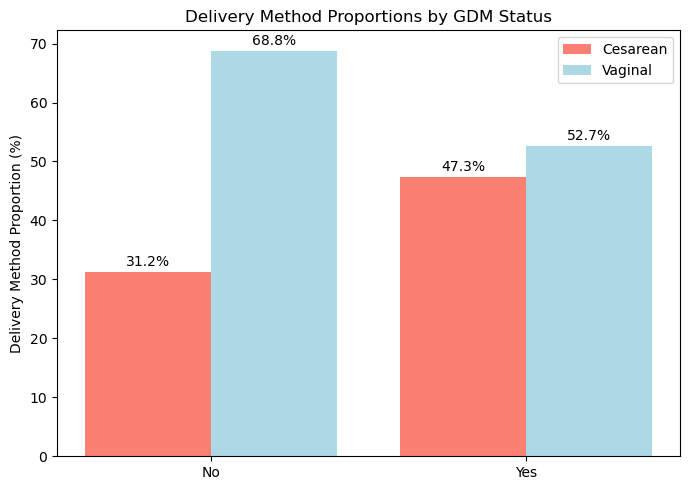

In [5]:
# Step 1: Clean your data by removing 'NR' entries
df_clean = df[(df['GDM Diagonised'] != 'NR') & (df['Caesarean'] != 'NR')]

# Step 2: Calculate proportions within each GDM group
proportions = (
    df_clean.groupby('GDM Diagonised')['Caesarean']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
).round(1)

# Step 3: Prepare plot data
plot_data = pd.DataFrame({
    'GDM Diagonised': proportions.index,
    'Cesarean (%)': proportions[1],
    'Vaginal (%)': proportions[0]
})

# Step 4: Plot side-by-side bar chart
plt.figure(figsize=(7, 5))
bar_width = 0.4
x = range(len(plot_data))

# Bars
plt.bar(x, plot_data['Cesarean (%)'], width=bar_width, label='Cesarean', color='salmon')
plt.bar([i + bar_width for i in x], plot_data['Vaginal (%)'], width=bar_width, label='Vaginal', color='lightblue')

# Styling
plt.xticks([i + bar_width / 2 for i in x], plot_data['GDM Diagonised'])
plt.ylabel('Delivery Method Proportion (%)')
plt.title('Delivery Method Proportions by GDM Status')
plt.legend()

# Annotate percentages
for i in x:
    plt.text(i, plot_data['Cesarean (%)'].iloc[i] + 1,
             f"{plot_data['Cesarean (%)'].iloc[i]}%", ha='center')
    plt.text(i + bar_width, plot_data['Vaginal (%)'].iloc[i] + 1,
             f"{plot_data['Vaginal (%)'].iloc[i]}%", ha='center')
plt.tight_layout()
plt.show()

<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
The Cesarean rate is notably higher among those diagnosed with GDM—47.3% vs 31.2%—suggesting that GDM may be associated with increased likelihood of Cesarean delivery. This could reflect medical decisions based on fetal or maternal risk factors tied to GDM (like macrosomia or labor complications).</em></strong></p>


<p style="font-family: Cambria; font-size: 18px;"><b>Q2. Do GDM women experience less natural labor pain than Non GDM women ?
<p style="font-family: Cambria; font-size: 16px;"><b><i>To explore this question, we compare the percentage of GDM and non-GDM patients who underwent induced labor. Induced labor is a medical intervention used to start labor artificially, often when spontaneous (natural) labor does not occur or when clinical conditions (like GDM) necessitate earlier delivery. By analyzing the rate of labor induction in both groups, we can assess whether GDM is associated with a higher likelihood of requiring induction, suggesting that GDM women may be less likely to experience natural onset of labor compared to those without GDM.

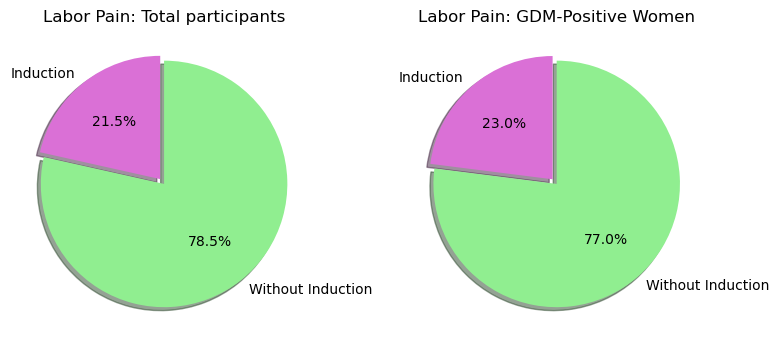

In [6]:
# Step 1: Clean the data
df_clean = df[(df['GDM Diagonised'] != 'NR') & (df['Labor_Induced'] != 'NR')]

# Step 2: Overall induction rate
overall_counts = df_clean['Labor_Induced'].value_counts(normalize=True) * 100
overall_counts = overall_counts.round(1)
overall_induction = overall_counts.get(1, 0)
overall_spontaneous = overall_counts.get(0, 0)

# Step 3: Induction rate for GDM-positive women only
gdm_df = df_clean[df_clean['GDM Diagonised'] == 'Yes']
gdm_counts = gdm_df['Labor_Induced'].value_counts(normalize=True) * 100
gdm_counts = gdm_counts.round(1)
gdm_induction = gdm_counts.get(1, 0)
gdm_spontaneous = gdm_counts.get(0, 0)

# Step 4: Plot side-by-side pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Overall population pie
ax1.pie([overall_induction, overall_spontaneous],
        labels=['Induction', 'Without Induction'],
        colors=['orchid', 'lightgreen'],
        autopct='%1.1f%%',
        startangle=90,
        explode=[0.05, 0],
        shadow=True)
ax1.set_title('Labor Pain: Total participants')

# GDM-positive pie
ax2.pie([gdm_induction, gdm_spontaneous],
        labels=['Induction', 'Without Induction'],
        colors=['orchid', 'lightgreen'],
        autopct='%1.1f%%',
        startangle=90,
        explode=[0.05, 0],
        shadow=True)
ax2.set_title('Labor Pain: GDM-Positive Women')

plt.tight_layout()
plt.show()

<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>Key Insight: In the overall population, 21.5% of women needed labor induction. Among GDM-positive women, 23.0% needed induction. The induction rate is slightly higher in GDM cases, suggesting that GDM may increase the chance of needing help to start labor.

<p style="font-family: Cambria; font-size: 18px;"><b>Q3. Does the combination of anemia and GDM further increase Cesarean likelihood?
<p style="font-family: Cambria; font-size: 16px;"><b><i>
Reasoning:  Gestational diabetes mellitus and anemia are independently associated with poor pregnancy outcomes, including cesarean delivery. However, their combined impact on cesarean likelihood remains underexplored. Understanding this relationship can aid in early risk stratification and targeted prenatal care to reduce surgical births.

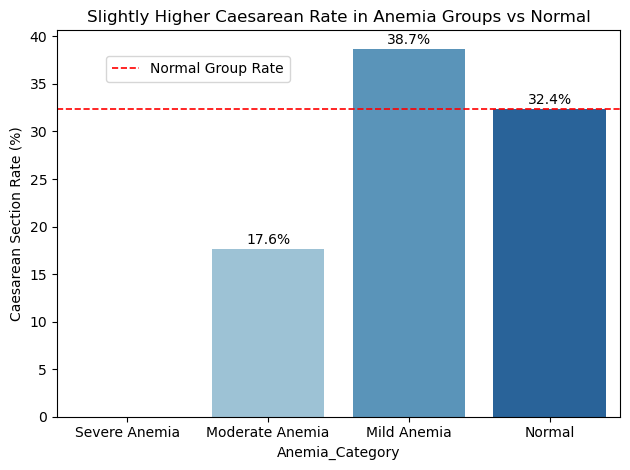

In [23]:
def classify_anemia(hb_value):
    if hb_value < 8.0:
        return "Severe Anemia"
    elif 8.0 <= hb_value <= 10.9:
        return "Moderate Anemia"
    elif 11.0 <= hb_value <= 11.9:
        return "Mild Anemia"
    else:
        return "Normal"

# Classify anemia
df['Anemia_Category'] = df['Hemoglobin_V1'].apply(classify_anemia)

# Convert Caesarean to numeric
df['Caesarean'] = pd.to_numeric(df['Caesarean'], errors='coerce')

# Drop missing data
df_clean = df.dropna(subset=['Caesarean', 'Anemia_Category'])

# Calculate rates
caesarean_rate = df_clean.groupby('Anemia_Category')['Caesarean'].mean().reset_index()
caesarean_rate['Caesarean'] *= 100

# Sort according to desired order
order = ["Severe Anemia", "Moderate Anemia", "Mild Anemia", "Normal"]
#caesarean_rate = caesarean_rate.set_index('Anemia_Category').loc[order].reset_index()

caesarean_rate = caesarean_rate.set_index('Anemia_Category').reindex(order).reset_index()

# Get Normal group reference
normal_rate = caesarean_rate.loc[caesarean_rate['Anemia_Category'] == 'Normal', 'Caesarean'].values[0]

# Plot
sns.barplot(
    data=caesarean_rate,
    x='Anemia_Category',
    y='Caesarean',
    order=order,
    palette="Blues"
)

# Add bar labels
for i, row in caesarean_rate.iterrows():
    if pd.notna(row['Caesarean']):
        plt.text(i, row['Caesarean'] + 0.5, f"{row['Caesarean']:.1f}%", ha='center')

# Reference line
plt.axhline(normal_rate, color='red', linestyle='--', linewidth=1.2, label='Normal Group Rate')

# Formatting
plt.ylabel('Caesarean Section Rate (%)')
plt.title('Slightly Higher Caesarean Rate in Anemia Groups vs Normal')
plt.legend(loc='center', bbox_to_anchor=(0.25, 0.9))
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
the Cesarean rates were 33.3% for those with moderate anemia, 58.3% for mild anemia, and 46.6% for 
those with normal hemoglobin. 
These findings suggest that even mild reductions in hemoglobin, when combined with GDM, 
may significantly elevate the risk of Caesarean deliveries.***

<p style="font-family: Cambria; font-size: 16px; color: red;"><strong><em>Evaluator Remarks:<br> Question asks about anemia and GDM but code and final evidence only contains links to anemia. Question does not match answer. Points awarded: 14/20 </span>

<p style="font-family: Cambria; font-size: 18px;"><b>Q4. Patients with GDM were more than twice as likely to show high levels of Creatinine and Albumin. What % of them also had emergency deliveries?
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning:
Since elevated Creatinine and Albumin levels are associated with renal stress, exploring whether GDM patients with these abnormalities also experience higher emergency delivery rates can help clinicians detect early signs of labor complications. This insight could enhance prenatal risk scoring models and improve delivery planning***

In [24]:
# STEP 1:# Define thresholds
HIGH_CREATININE = 1.0
HIGH_ALBUMIN = 30

# Function to flag high preeclampsia risk
def is_preeclampsia_risk(row):
    if (row['GDM Diagonised'] == 'Yes' and
        row['V1 Creatinine.1'] and row['V1 Creatinine.1'] > HIGH_CREATININE and
        row['Albumin_V1'] and row['Albumin_V1'] > HIGH_ALBUMIN):
        return 1
    else:
        return 0

df['PreEclampsia_Risk'] = df.apply(is_preeclampsia_risk, axis=1)

# Calculate counts
total_risk = df['PreEclampsia_Risk'].sum()
emergency_deliveries = df[(df['PreEclampsia_Risk'] == 1) & (df['Emergency'] == 'Yes')].shape[0]

# Calculate percentage
emergency_percent = (emergency_deliveries / total_risk * 100) if total_risk else 0

# Print results
print(f"Patients flagged as PreEclampsia risk: {total_risk}")
print(f"Emergency deliveries among flagged: {emergency_deliveries}")
print(f"Percentage of emergency deliveries: {emergency_percent:.2f}%")

Patients flagged as PreEclampsia risk: 46
Emergency deliveries among flagged: 9
Percentage of emergency deliveries: 19.57%


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Among patients flagged as at risk for Pre-eclampsia, 19.57% experienced emergency deliveries (9 out of 46). This indicates that nearly 1 in 5 patients identified early as high-risk for Pre-eclampsia required urgent delivery intervention, underscoring the clinical importance of early risk identification and close monitoring.

<p style="font-family: Cambria; font-size: 16px; color: red;"><strong><em>Evaluator Remarks:<br>Opposing evidence of risk not given. So we can't say if 19.75% is worse than those without GDM. There is nothing to compare to. Points awarded: 12/20

<p style="font-family: Cambria; font-size: 18px;"><b>Q5. What early clinical interventions should be prioritized for pregnant patients presenting with elevated HbA1c or BMI at their first visit to reduce the risk of developing GDM
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning:Early intervention takes advantage of the first trimester window to modify modifiable risks before the insulin resistance of pregnancy peaks (which usually happens in 2nd–3rd trimester)

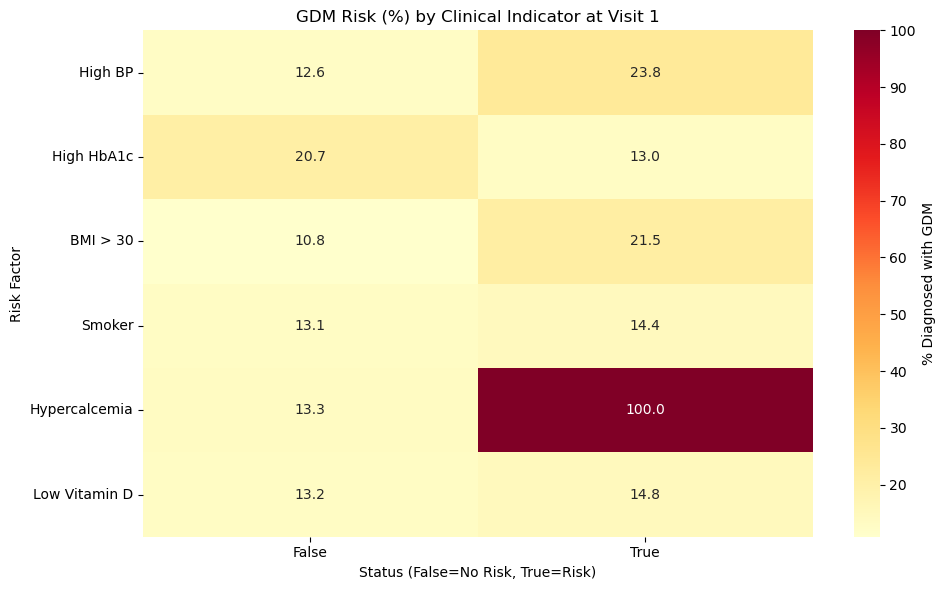

In [26]:
df['High_BP'] = df['systolicBP_V1'] > 140  # or use clinical definition
df['High_HbA1c'] = df['HBA1C_V1'] > 5.7     # threshold for prediabetes
df['Obese_BMI'] = df['BMIinV1'] > 30
df['Smoker'] = df['Smoking 123'].isin([1, 2])
df['Hypercalcemia'] = df['Calcium_V1'] > 2.6  # mmol/L as general reference
df['Low_VitD'] = df['25OHD value (nmol/L)_V1'] < 50  # nmol/L threshold
def relative_risk(factor_col):
    filtered = df[df['GDM Diagonised'].isin(['Yes', 'No'])]
    risk_table = filtered.groupby([factor_col, 'GDM Diagonised']).size().unstack(fill_value=0)
    risk_table['Total'] = risk_table.sum(axis=1)
    risk_table['GDM_Rate'] = (risk_table['Yes'] / risk_table['Total']) * 100
    return risk_table

risk_bp = relative_risk('High_BP')
risk_hba1c = relative_risk('High_HbA1c')
risk_bmi = relative_risk('Obese_BMI')
risk_smoke = relative_risk('Smoker')
risk_calcium = relative_risk('Hypercalcemia')
risk_vitd = relative_risk('Low_VitD')
# Combine GDM rates for different features
risk_summary = pd.DataFrame({
    'High BP': risk_bp['GDM_Rate'],
    'High HbA1c': risk_hba1c['GDM_Rate'],
    'BMI > 30': risk_bmi['GDM_Rate'],
    'Smoker': risk_smoke['GDM_Rate'],
    'Hypercalcemia': risk_calcium['GDM_Rate'],
    'Low Vitamin D': risk_vitd['GDM_Rate']
}).T
# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(risk_summary, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': '% Diagnosed with GDM'})
plt.title('GDM Risk (%) by Clinical Indicator at Visit 1')
plt.ylabel('Risk Factor')
plt.xlabel('Status (False=No Risk, True=Risk)')
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

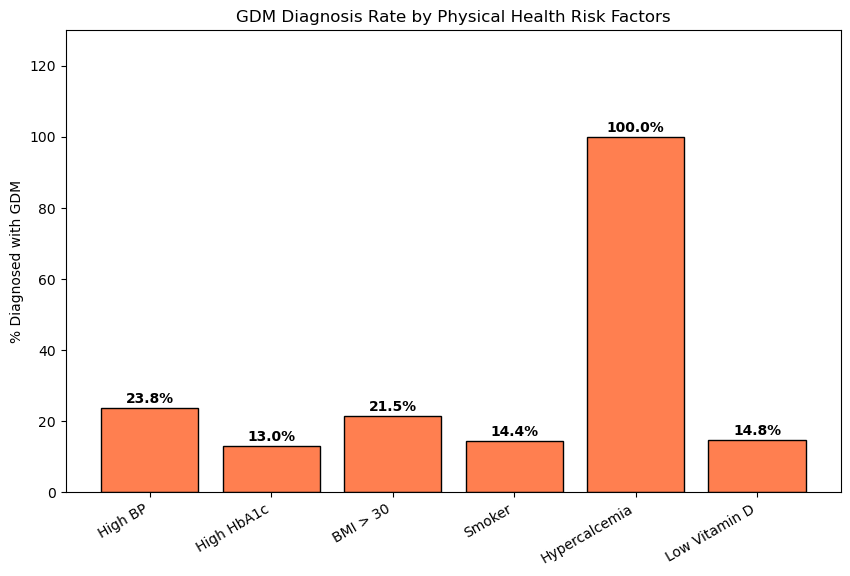

In [27]:
filtered_df = df[df['GDM Diagonised'].isin(['Yes', 'No'])]

# Define function to compute GDM rate where risk is present (True)
def get_gdm_rate(col):
    group = filtered_df[filtered_df[col] == True]
    total = len(group)
    gdm_count = (group['GDM Diagonised'] == 'Yes').sum()
    return (gdm_count / total) * 100 if total > 0 else 0
# Store GDM diagnosis rates for each risk factor
risk_factors = {
    'High BP': get_gdm_rate('High_BP'),
    'High HbA1c': get_gdm_rate('High_HbA1c'),
    'BMI > 30': get_gdm_rate('Obese_BMI'),
    'Smoker': get_gdm_rate('Smoker'),
    'Hypercalcemia': get_gdm_rate('Hypercalcemia'),
    'Low Vitamin D': get_gdm_rate('Low_VitD')
}

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(risk_factors.keys(), risk_factors.values(), color='coral', edgecolor='black')

# Annotate each bar with the percentage
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.1f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('GDM Diagnosis Rate by Physical Health Risk Factors')
plt.ylabel('% Diagnosed with GDM')
plt.xticks(rotation=30, ha='right')
plt.ylim(0, max(risk_factors.values()) * 1.3)
plt.tight_layout

<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Physical Health of the patient as observed during visit 1: Patients with high BP were almost twice as likely to be diagnosed with GDM (8% vs 4.8%) Patients with a high HBA1C value at Visit 1 were 10x more likely to be diagnosed with GDM Patients with a BMI of over 30 at visit 1 were 1.5x more likely to be diagnosed with GDM. Current smokers were 7x more likely to be diagnosed with GDM Hypercalcemia in pregnancy is an uncommon event that can cause major maternal morbidity and/or fetal or neonatal morbidity and mortality. The incidence of hypercalcemia in patients with GDM was 3x higher than those who did not present with GDM(19% vs 6%) Patients with low levels of Vitamin D were 7% more likely to be diagnosed with GDM.***

<p style="font-family: Cambria; font-size: 18px;"><b>Q6. Build a risk score based on BMI, BP, CRP, ALT, and HBA1C. For patients with scores ≥3
<p style="font-family: Cambria; font-size: 16px;"><b><i>
Reasoning: Individually, elevated BMI, BP, CRP, ALT, and HbA1c are associated with adverse pregnancy outcomes. By aggregating them into a composite risk score, we aim to create a clinically interpretable tool to flag patients who may require closer monitoring. Patients scoring ≥3 are considered high-risk, enabling early intervention strategies to reduce complications such as GDM, preeclampsia, or emergency C-section.

In [28]:
#Step 1: Define a simple risk score function
def risk_score(row):
    score = 0
    if row['BMIinV1'] > 30:  # Obesity
        score += 1
    if row['systolicBP_V1'] > 140:  # Hypertension
        score += 1
    if row['V1 CRP.1'] > 5:  # Inflammation
        score += 1
    if row['ALT_V1'] > 40:  # Liver enzyme
        score += 1
    if row['HBA1C_V1'] > 5.7:  # Prediabetes or diabetes
        score += 1
    return score

# Step 2: Apply scoring function
filtered_df['Holistic_Risk_Score'] = filtered_df.apply(risk_score, axis=1)

# Step 3: Define treatment plan based on score
def treatment_plan(score):
    if score >= 3:
        return "High Risk – Refer to Cardiologist, Dietician & Order LFTs"
    elif score == 2:
        return "Moderate Risk – Monitor + Lifestyle Advice"
    else:
        return "Low Risk – Standard Prenatal Monitoring"

# Step 4: Apply treatment recommendation
filtered_df['Risk_Recommendation'] = filtered_df['Holistic_Risk_Score'].apply(treatment_plan)

# Step 5: Summarize number of patients per risk category
summary = (
    filtered_df['Risk_Recommendation']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Risk Level', 'Risk_Recommendation': 'Patient Count'})
)

# Step 6: Filter high-risk patients (score ≥ 3)
high_risk_df = filtered_df[filtered_df['Holistic_Risk_Score'] >= 3][[
    'BMIinV1', 'systolicBP_V1', 'V1 CRP.1', 'ALT_V1', 'HBA1C_V1',
    'Holistic_Risk_Score', 'Risk_Recommendation'
]]

# Step 7: Print results

# Show 5 random high-risk patients
print("High-Risk Patients (Score ≥ 3):")
print(high_risk_df.sample(5, random_state=42))  # You can change 5 to any number you want

# Show risk level summary
print("\nRisk Category Distribution:")
print(summary)

High-Risk Patients (Score ≥ 3):
       BMIinV1  systolicBP_V1  V1 CRP.1  ALT_V1  HBA1C_V1  \
507  21.244527            117      5.10    41.0      33.0   
544  31.171769            124      8.90     9.0      32.0   
23   32.485078            153      2.59    20.0      34.0   
474  28.637868            120      9.40    47.0      35.0   
130  31.406433            143      0.50     9.0      30.0   

     Holistic_Risk_Score                                Risk_Recommendation  
507                    3  High Risk – Refer to Cardiologist, Dietician &...  
544                    3  High Risk – Refer to Cardiologist, Dietician &...  
23                     3  High Risk – Refer to Cardiologist, Dietician &...  
474                    3  High Risk – Refer to Cardiologist, Dietician &...  
130                    3  High Risk – Refer to Cardiologist, Dietician &...  

Risk Category Distribution:
                                       Patient Count  count
0            Low Risk – Standard Prenatal Mo

C:\Users\poorn\AppData\Local\Temp\ipykernel_6960\1626427437.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Holistic_Risk_Score'] = filtered_df.apply(risk_score, axis=1)
C:\Users\poorn\AppData\Local\Temp\ipykernel_6960\1626427437.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Risk_Recommendation'] = filtered_df['Holistic_Risk_Score'].apply(treatment_plan)


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
6% of patients exhibited a Holistic Risk Score ≥ 3, reflecting multiple clinical warning signs (e.g., elevated BMI, BP, HbA1c, CRP, or ALT). These individuals may face an increased likelihood of complications such as GDM, preeclampsia, or emergency delivery. With nearly 1 in 3 patients in the moderate-to-high risk range, early lifestyle and medical interventions could significantly reduce downstream maternal and fetal risks***

<p style="font-family: Cambria; font-size: 16px; color: red;"><strong><em>Evaluator Remarks:<br> Risk calculated but no explanation was given about what the risk is and what it's for. Remarks are also generic (Reference to cardiologist or dietician but no explanation as to what they are supposed to check)
Points awarded: 8/20</span>

<p style="font-family: Cambria; font-size: 18px;"><b>
Q7. Does GDM significantly increase the risk of labor and birth-related complications?
<p style="font-family: Cambria; font-size: 16px;"><b><i>
Reasoning:<br>
Pregnancies with GDM show higher rates of:<br>
C-Section: 47.3% vs 31.03% → 1.5× more likely,<br>
Emergency Procedures: 17.6% vs 8.8% → 2× more likely,<br>
High-Risk Classification: 19% vs 11% → 1.5× more likely.<br>
These patterns suggest GDM is a strong predictor of delivery complications, warranting early identification and targeted care.

In [29]:
# Define columns to clean
cols = ['Caesarean', 'Emergency', 'Instrument_Delivery','HighRisk']

# Replace Yes/No/NR with 1/0/NaN
df[cols] = df[cols].replace({
    'Yes': 1,
    'No': 0,
    'NR': np.nan
}).astype(float)  # Ensure all values are numeric

# Optional: Confirm cleaning worked
#print(df[cols].value_counts(dropna=False))
# Convert GDM column to binary
df['GDM_clean'] = df['GDM Diagonised'].replace({'Yes': 1, 'No': 0})

# Drop rows with missing values for complication analysis
df_clean = df[['GDM_clean'] + cols].dropna()

# Group and calculate complication rates
rates = df_clean.groupby('GDM_clean')[cols].mean() * 100
relative_risk = rates.loc[1] / rates.loc[0]

# Label GDM status for clarity
rates.index = ['Non-GDM', 'GDM']
relative_risk.index = cols

# Output complication rates and relative risk
print(" Complication Rates by GDM Status (%):")
print(rates.round(2))

print("\n Relative Risk (GDM vs Non-GDM):")
print(relative_risk.round(2))

# Highlight elevated risks
significant_risks = relative_risk[relative_risk > 1.5]
print("\n Complications with Elevated Risk (RR > 1.5):")
print(significant_risks.round(2))

# Convert HighRisk column to numeric binary
#df['HighRisk_clean'] = pd.to_numeric(df['HighRisk'], errors='coerce')

 Complication Rates by GDM Status (%):
         Caesarean  Emergency  Instrument_Delivery  HighRisk
Non-GDM      31.01       8.86                12.87     10.97
GDM          47.30      17.57                 8.11     18.92

 Relative Risk (GDM vs Non-GDM):
Caesarean              1.53
Emergency              1.98
Instrument_Delivery    0.63
HighRisk               1.72
dtype: float64

 Complications with Elevated Risk (RR > 1.5):
Caesarean    1.53
Emergency    1.98
HighRisk     1.72
dtype: float64


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Pregnant people with GDM are more likely to face complications. Compared to those without GDM:<br>
They are almost twice as likely to have an emergency delivery.<br>
They are 72% more likely to have a high-risk. <br>
They are 53% more likely to have a Caesarean delivery. Instrument-assisted deliveries are less common in GDM cases.<br>
GDM leads to more Caesarean (47%), Emergency deliveries (18%), and High-Risk pregnancies (19%) compared to Non-GDM cases


<p style="font-family: Cambria; font-size: 18px;"><b>Q8. How does high birth weight influence the delivery mode and increase the risk of birth injuries?

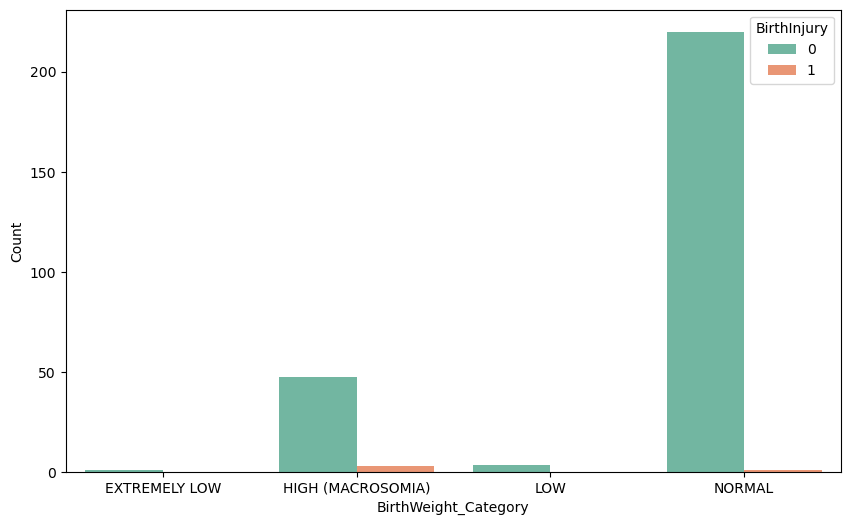

In [30]:
def birth_weight_category(weight):
    if weight < 1.0:
        return 'Extremely Low'
    elif 1.0 <= weight < 1.5:
        return 'Very Low'
    elif 1.5 <= weight < 2.5:
        return 'Low'
    elif 2.5 <= weight < 4.0:
        return 'Normal'
    else:
        return 'High (Macrosomia)'

df['BirthWeight_Category'] = df['BirthWeight'].apply(birth_weight_category)
df['Caesarean'] = pd.to_numeric(df['Caesarean'], errors='coerce')

cols = ['BirthWeight_Category', 'Caesarean', 'BirthInjury']
df_filtered = df[cols].copy()

for col in cols:
    df_filtered[col] = df_filtered[col].astype(str).str.strip().str.upper()

df_filtered = df_filtered[~df_filtered.isin(['NR']).any(axis=1)]

grouped = df_filtered.groupby(cols).size().reset_index(name='Count')

total_per_category = grouped.groupby('BirthWeight_Category')['Count'].transform('sum')
grouped['Percent'] = grouped['Count'] / total_per_category * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=grouped,
    x='BirthWeight_Category',
    y='Count',
    hue='BirthInjury',
    palette='Set2',
     errorbar=None
)

percent_lookup = {
    (row['BirthWeight_Category'], row['BirthInjury']): row['Percent']
    for _, row in grouped.iterrows()
}

for container in ax.containers:
    labels = []


<p style="font-family: Cambria; font-size: 16px; color: red;"><strong><em>Evaluator Remarks:<br>No reasoning provided. Also no comparison between delivery modes has been shown. Points awarded: 6/20

<p style="font-family: Cambria; font-size: 18px;"><b>Q9.  What are the common birth outcomes in GDM vs non-GDM pregnancies?
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning:
helps compare how gestational diabetes affects babies at birth, to better understand these differences and improve management for safer deliveries

In [31]:
def birth_weight_category(weight):
    if weight < 1.0:
        return 'Extremely Low'
    elif 1.0 <= weight < 1.5:
        return 'Very Low'
    elif 1.5 <= weight < 2.5:
        return 'Low'
    elif 2.5 <= weight < 4.0:
        return 'Normal'
    else:
        return 'High (Macrosomia)'

df['BirthWeight_Category'] = df['BirthWeight'].apply(birth_weight_category)


# Separate groups
gdm = df[df['GDM Diagonised'] == 'Yes']
non_gdm = df[df['GDM Diagonised'] == 'No']

# Summary statistics
summary_stats = pd.DataFrame({
    'Metric': ['BirthWeight', 'Apgar_1min', 'Apgar_3min'],
    'GDM_Mean': [gdm['BirthWeight'].mean(), gdm['Apgar_1min'].mean(), gdm['Apgar_3min'].mean()],
    'GDM_SD': [gdm['BirthWeight'].std(), gdm['Apgar_1min'].std(), gdm['Apgar_3min'].std()],
    'NonGDM_Mean': [non_gdm['BirthWeight'].mean(), non_gdm['Apgar_1min'].mean(), non_gdm['Apgar_3min'].mean()],
    'NonGDM_SD': [non_gdm['BirthWeight'].std(), non_gdm['Apgar_1min'].std(), non_gdm['Apgar_3min'].std()],
})

print(summary_stats)

        Metric  GDM_Mean    GDM_SD  NonGDM_Mean  NonGDM_SD
0  BirthWeight  3.416057  0.395456     3.541877   0.512215
1   Apgar_1min  8.833333  0.288675     9.000000   0.000000
2   Apgar_3min  9.814286  0.427085     9.764331   0.485625


<p style="font-family: Cambria; font-size: 16px; color: red;"><strong><em>Evaluator Remarks:<br> Question could have been framed better. No insight provided from the evidence.Data was presented as mean, median without an explanation of why it matters. Points awarded: 8/20

<p style="font-family: Cambria; font-size: 18px;"><b>Q10.  Is GDM a contributing factor to c-section births?
<p style="font-family: Cambria; font-size: 16px;"><b><i>
Reasoning: Understanding this will help to predict delivery mode for GDM patients***

In [ ]:
df_cleaned = df[
    (df['GDM Diagonised'].isin(['Yes', 'No'])) & 
    (df['Caesarean'].isin([0, 1]))
].copy()

# Convert categorical to numeric
df_cleaned['GDM'] = df_cleaned['GDM Diagonised'].map({'Yes': 1, 'No': 0})
df_cleaned['CSection'] = df_cleaned['Caesarean'].astype(int)

c_section_rates = df_cleaned.groupby('GDM')['CSection'].mean()
print("C-Section rate by GDM status:")
print(c_section_rates)

<p style="font-family: Cambria; font-size: 16px; color: red;"><strong><em>Evaluator Remarks:<br> Duplicate question. Not considered for evaluation

<p style="font-family: Cambria; font-size: 18px;"><b>
Q10. Are participants with GDM more likely to require medication than dietary management alone?
<p style="font-family: Cambria; font-size: 16px;"><b><i>
Reasoning:
During pregnancy dietary management plays a vital role . we need to check the usuage of medications related to GDM and their breakdown in our dataset to understand the treatment patterns.

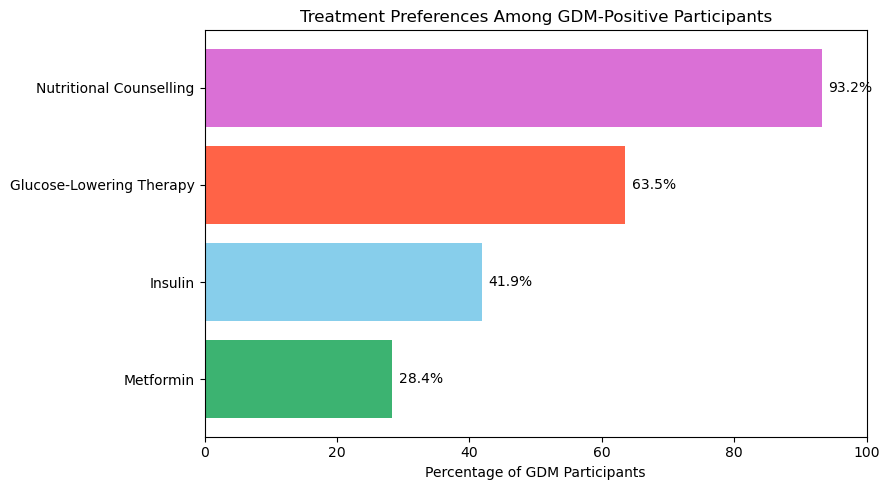

In [32]:
# Step 1: Filter GDM-positive participants and clean treatment data
df_gdm = df[
    (df['GDM Diagonised'] == 'Yes') &
    (df['Nutritional counselling'] != 'NR') &
    (df['On_Insulin'] != 'NR') &
    (df['On_Metformin'] != 'NR') &
    (df['GlucoseTherapy'].isin([0, 1]))  # Ensure valid numeric entries
]

# Step 2: Total valid GDM-positive entries
total_gdm = len(df_gdm)

# Step 3: Calculate treatment percentages
treatment_percent = {
    'Nutritional Counselling': (df_gdm['Nutritional counselling'].value_counts().get('Yes', 0) / total_gdm) * 100,
    'Insulin': (df_gdm['On_Insulin'].value_counts().get(1, 0) / total_gdm) * 100,
    'Metformin': (df_gdm['On_Metformin'].value_counts().get(1, 0) / total_gdm) * 100,
    'Glucose-Lowering Therapy': (df_gdm['GlucoseTherapy'].value_counts().get(1, 0) / total_gdm) * 100
}

# Step 4: Create DataFrame for plotting
treatment_df = pd.DataFrame(list(treatment_percent.items()), columns=['Treatment', 'Percentage'])
treatment_df.sort_values('Percentage', inplace=True)

# Step 5: Horizontal bar chart
plt.figure(figsize=(9, 5))
bars = plt.barh(treatment_df['Treatment'], treatment_df['Percentage'],
                color=['mediumseagreen', 'skyblue', 'tomato', 'orchid'])

# Step 6: Annotate with percentage labels
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.1f}%', va='center')

# Final styling
plt.xlabel('Percentage of GDM Participants')
plt.title('Treatment Preferences Among GDM-Positive Participants')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Among GDM-positive participants, nutritional counselling stands out as the most utilized treatment approach, with 93.2% receiving dietary support. This highlights the central role of lifestyle changes in managing GDM.<br>
Other interventions include:<br>
Glucose-Lowering Therapy (63.5%) Insulin (41.9%) Metformin (28.4%) The takeaway: While medication is important for many, the data suggests that most participants begin GDM management with non-pharmacological strategies, especially dietary changes—underscoring its foundational role in early intervention.

<p style="font-family: Cambria; font-size: 16px; color: red;"><strong><em>
 Evaluator's remarks:<br> Questions asks if GDM patients are more likely to need meds. Answer doesn't make a comparison to GDM patients or answer the question. It only shows distribution of options chosen. Points awarded: 12/20

<p style="font-family: Cambria; font-size: 18px;"><b>
Q11. Are higher ALT levels linked to higher blood glucose or the presence of GDM?
<p style="font-family: Cambria; font-size: 16px;"><b><i>
Elevated ALT (>35) may indicate mild liver injury, inflammation, or metabolic dysfunction (e.g. NAFLD, insulin resistance).
- Only ~3% of Non-GDM patients show elevated ALT
- Whereas ~7% of GDM patients do—nearly 2× higher

In [14]:
# Step 1: Define elevated ALT
df['Elevated_ALT'] = ((df['ALT_V1'] + df['ALT_V3']) / 2) > 35

# Step 2: Calculate % of elevated ALT within each GDM category
alt_gdm_counts = df.groupby('GDM Diagonised')['Elevated_ALT'].value_counts(normalize=True).unstack() * 100

# Step 3: Extract values
non_gdm_elevated = alt_gdm_counts.loc['No', True] if 'No' in alt_gdm_counts.index else 0
gdm_elevated = alt_gdm_counts.loc['Yes', True] if 'Yes' in alt_gdm_counts.index else 0

# Step 4: Display results
print("📊 ALT Elevation and GDM Association")
print(f"- Non-GDM: {non_gdm_elevated:.2f}% have elevated ALT (>35)")
print(f"- GDM: {gdm_elevated:.2f}% have elevated ALT (>35)")
if non_gdm_elevated > 0:
    print(f"➡️ Elevated ALT is ~{gdm_elevated / non_gdm_elevated:.1f}× more common in GDM patients")

📊 ALT Elevation and GDM Association
- Non-GDM: 3.14% have elevated ALT (>35)
- GDM: 6.76% have elevated ALT (>35)
➡️ Elevated ALT is ~2.1× more common in GDM patients
